In [2]:
import pandas as pd
import matplotlib.pyplot as plt
comp=pd.read_excel("comp.xlsx")
comp.head()
comp = comp.drop(['Unnamed: 0'],axis=1)
comp.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


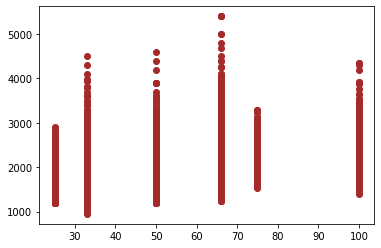

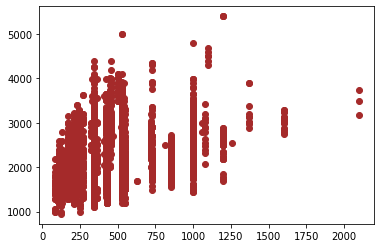

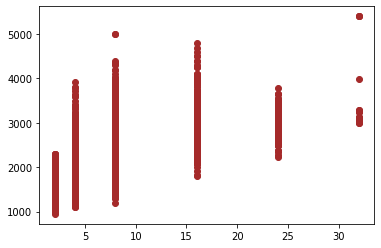

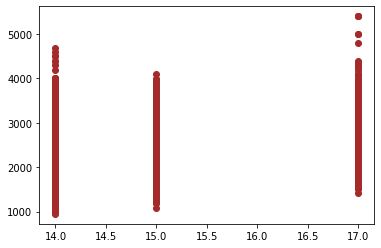

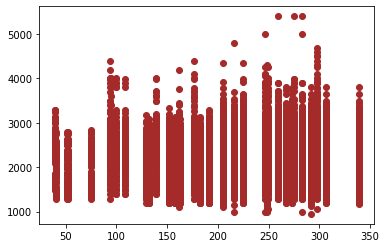

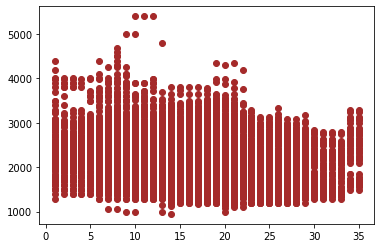

In [25]:
#EDA
comp.shape
comp.dtypes
comp.isna
comp.describe()


plt.scatter(x=comp['speed'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['hd'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['ram'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['screen'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['ads'],y=comp['price'],color="brown")
plt.show()
plt.scatter(x=comp['trend'],y=comp['price'],color="brown")
plt.show()


In [6]:
#convert non-numeric data to numeric#
from sklearn.preprocessing import LabelEncoder 
enc=LabelEncoder()
enc.fit(comp['cd'])
comp['cd'] = enc.transform(comp['cd'])

enc.fit(comp['multi'])
comp['multi'] = enc.transform(comp['multi'])


enc.fit(comp['premium'])
comp['premium'] = enc.transform(comp['premium'])

comp.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [7]:
#split the data into train and test data set#
from sklearn.model_selection import train_test_split
comp_train,comp_test=train_test_split(comp,test_size=0.3)

In [8]:
#train the model using train data set#
import statsmodels.formula.api as slm
model1=slm.ols('price~speed+hd+ram+screen+cd+multi+premium+ads+trend',data=comp_train).fit()
model1.summary() #r^2=0.780

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1723.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:28:58   Log-Likelihood:                -30796.
No. Observations:                4381   AIC:                         6.161e+04
Df Residuals:                    4371   BIC:                         6.168e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    307.7021     71.600      4.298      0.000     167.331     448.073
speed          9.2128      0.219     42.081      0.000       8.784       9.642
hd             0.7966      0.033     23.950      0.000       0.731       0.862
ram           48.7002      1.272     38.282      0.000      46.206      51.194
screen       123.1435      4.727     26.051      0.000     113.876     132.411
cd            54.3769     11.343      4.794      0.000      32.140      76.614
multi        101.4769     13.543      7.493      0.000      74.926     128.028
premium     -520.1100     14.900    -34.907      0.000    -549.321    -490.899
ads            0.6897      0.061     11.397      0.000       0.571       0.808
trend        -51.7197      0.745    -69.383      0.000     -53.181     -50.258
==============================================================================
Omnibus:                      575.502   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1456.802
Skew:                           0.741   Prob(JB):                         0.00
Kurtosis:                       5.405   Cond. No.                     9.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#calculating vif values for model1
rsq_sp=slm.ols('speed~hd+ram+screen+cd+multi+premium+ads+trend',data=comp_train).fit().rsquared
vif_sp=1/(1-rsq_sp) #1.269
vif_sp

rsq_hd=slm.ols('hd~speed+ram+screen+cd+multi+premium+ads+trend',data=comp_train).fit().rsquared
vif_hd=1/(1-rsq_hd) #4.314
vif_hd

rsq_ram=slm.ols('ram~hd+speed+screen+cd+multi+premium+ads+trend',data=comp_train).fit().rsquared
vif_ram=1/(1-rsq_ram) #3.003
vif_ram

rsq_sc=slm.ols('screen~speed+hd+ram+cd+multi+premium+ads+trend',data=comp_train).fit().rsquared
vif_sc=(1/(1-rsq_sc)) #1.085
vif_sc

rsq_cd=slm.ols('cd~speed+hd+ram+screen+multi+premium+ads+trend',data=comp_train).fit().rsquared
vif_cd=1/(1-rsq_cd) #1.8746
vif_cd

rsq_mul=slm.ols('multi~speed+hd+ram+screen+cd+premium+ads+trend',data=comp_train).fit().rsquared
vif_mul=1/(1-rsq_mul) #1.2934
vif_mul

rsq_pre=slm.ols('premium~speed+hd+ram+screen+cd+multi+ads+trend',data=comp_train).fit().rsquared
vif_pre=1/(1-rsq_pre) #1.106
vif_pre

rsq_ad=slm.ols('ads~speed+hd+ram+screen+cd+multi+premium+trend',data=comp_train).fit().rsquared
vif_ad=1/(1-rsq_ad) #1.2019
vif_ad

rsq_tr=slm.ols('trend~speed+hd+ram+screen+cd+multi+premium+ads',data=comp_train).fit().rsquared
vif_tr=1/(1-rsq_tr) #2.040
vif_tr

2.0404107171360564

In [21]:
#removing multi and premium from the as they don't have much influence on the price according to their p values
model2=slm.ols('price~speed+hd+ram+screen+cd+ads+trend',data=comp_train).fit()
model2.summary() #r^2=0.717

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1586.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:31:52   Log-Likelihood:                -31346.
No. Observations:                4381   AIC:                         6.271e+04
Df Residuals:                    4373   BIC:                         6.276e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -270.0334     78.586     -3.436      0.001    -424.101    -115.966
speed          8.7286      0.248     35.250      0.000       8.243       9.214
hd             0.7153      0.038     19.072      0.000       0.642       0.789
ram           46.9622      1.439     32.637      0.000      44.141      49.783
screen       129.0512      5.347     24.137      0.000     118.569     139.533
cd            26.5548     11.500      2.309      0.021       4.010      49.100
ads            0.9520      0.068     14.008      0.000       0.819       1.085
trend        -47.7311      0.834    -57.230      0.000     -49.366     -46.096
==============================================================================
Omnibus:                      987.766   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2605.373
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       5.907   Cond. No.                     8.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#predict using train data
import numpy as np
predict_train=model2.predict(comp_train)
err_train=comp_train.price-predict_train
rmse_train=np.sqrt(np.mean(err_train*err_train))
rmse_train #309.83


#predict using test data
predict_test=model2.predict(comp_test)
err_test=comp_test.price-predict_test
rmse_test=np.sqrt(np.mean(err_test*err_test))
rmse_test #314.47


314.4778287242496